# Notebook 02 — Exploratory Data Analysis (EDA) & Visualisasi

**Tujuan:**  
1. Memahami distribusi occurrence rumput laut di wilayah Jepang.  
2. Memeriksa distribusi environmental variables (SST & Salinity).  
3. Membuat visualisasi awal untuk portofolio.

# 1️⃣ Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

## 2️⃣ Load Dataset Notebook 01

In [2]:
df = pd.read_csv("../data/processed/occurrence_with_environment.csv")
print(df.shape)
df.head()

(12762, 10)


,scientificName,decimalLatitude,decimalLongitude,eventDate,minimumDepthInMeters,maximumDepthInMeters,verbatimDepth,basisOfRecord,sst_mean,salinity_mean
0,Undaria pinnatifida f. pinnatifida,45.32,141.05,2005-05-21,NaN,NaN,NaN,PreservedSpecimen,10.479646,33.538726
1,Saccharina japonica var. ochotensis,45.32,141.05,2005-05-21,NaN,NaN,NaN,PreservedSpecimen,10.479646,33.538726
2,Saccharina japonica var. ochotensis,45.32,141.05,2005-05-21,NaN,NaN,NaN,PreservedSpecimen,10.479646,33.538726
3,Costaria costata,45.32,141.05,2005-05-21,NaN,NaN,NaN,PreservedSpecimen,10.479646,33.538726
4,Undaria pinnatifida f. pinnatifida,45.12,141.18,2005-05-22,NaN,NaN,NaN,PreservedSpecimen,10.634725,33.447089


## 3️⃣ Distribusi Jumlah Occurrence per Spesies

/var/folders/tr/hsp97wws7616hmchtwqyhv4h0000gn/T/ipykernel_28105/2705778632.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=species_count.values, y=species_count.index, palette="viridis")


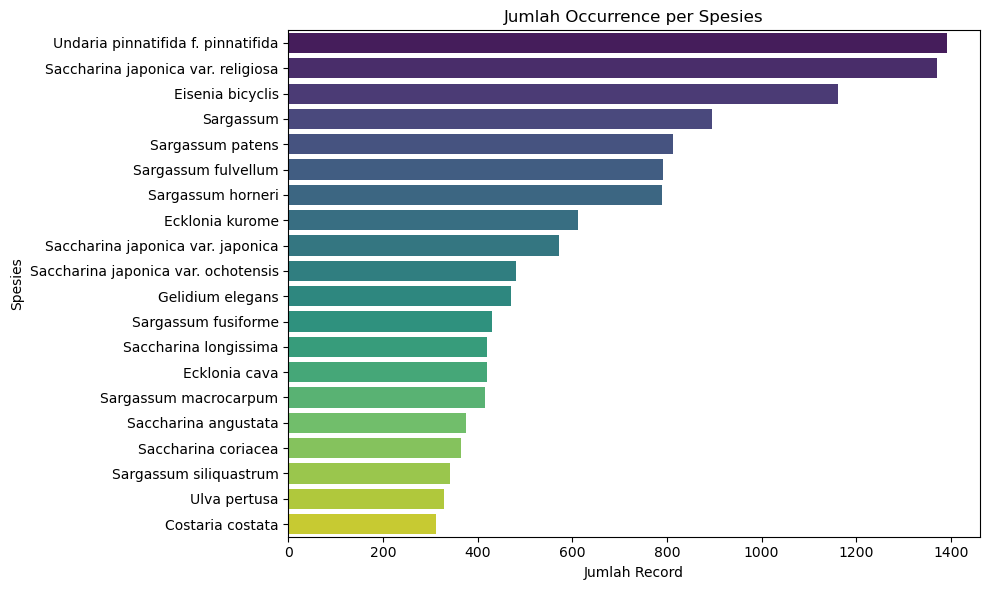

In [3]:
species_count = df["scientificName"].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=species_count.values, y=species_count.index, palette="viridis")
plt.title("Jumlah Occurrence per Spesies")
plt.xlabel("Jumlah Record")
plt.ylabel("Spesies")
plt.tight_layout()
plt.savefig("../figures/eda_species_count.png", dpi=300)
plt.show()

## 4️⃣ Distribusi Depth

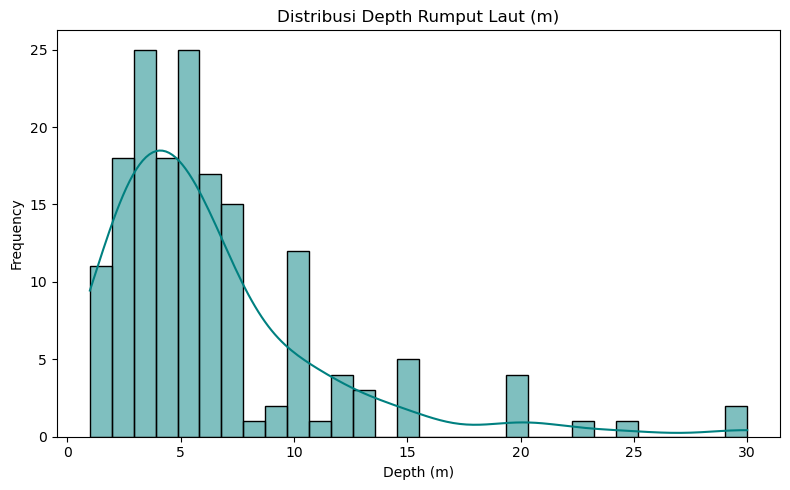

In [4]:
# Buat kolom depth mean jika tersedia
df["depth_m"] = df[["minimumDepthInMeters","maximumDepthInMeters"]].mean(axis=1)

plt.figure(figsize=(8,5))
sns.histplot(df["depth_m"].dropna(), bins=30, kde=True, color="teal")
plt.title("Distribusi Depth Rumput Laut (m)")
plt.xlabel("Depth (m)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("../figures/eda_depth_distribution.png", dpi=300)
plt.show()

## 5️⃣ Distribusi Environmental Variables

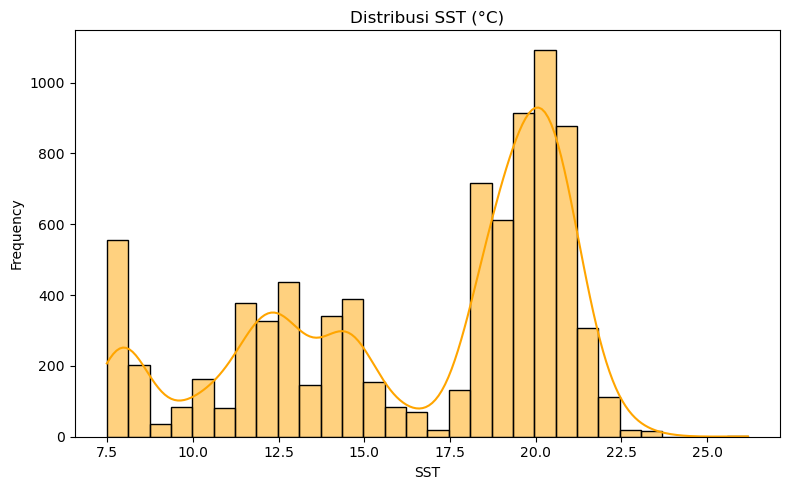

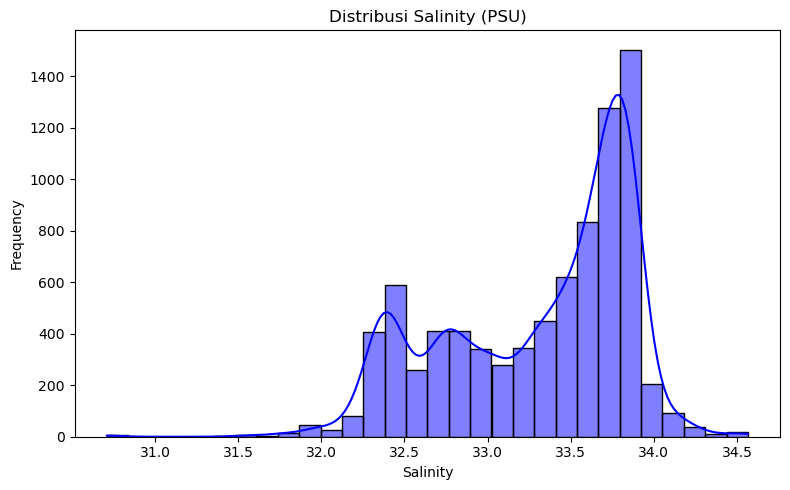

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df["sst_mean"].dropna(), bins=30, kde=True, color="orange")
plt.title("Distribusi SST (°C)")
plt.xlabel("SST")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("../figures/eda_sst_distribution.png", dpi=300)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df["salinity_mean"].dropna(), bins=30, kde=True, color="blue")
plt.title("Distribusi Salinity (PSU)")
plt.xlabel("Salinity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("../figures/eda_salinity_distribution.png", dpi=300)
plt.show()

## 6️⃣ Visualisasi Spatial Occurrence (Map Jepang)

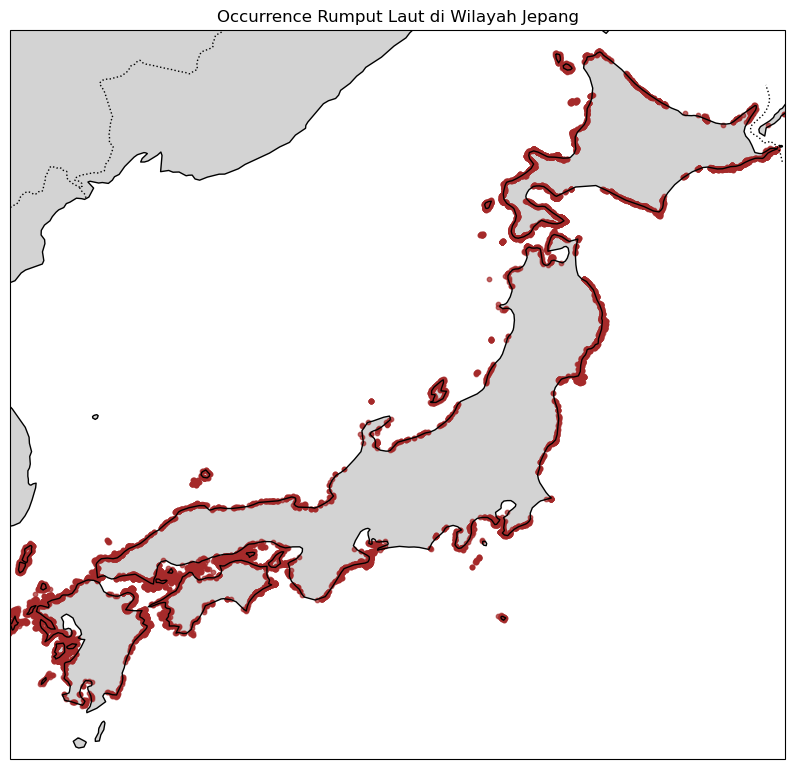

In [6]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([129, 146, 30, 46])  # Fokus Jepang

# Land, coastlines, borders
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot occurrence points
ax.scatter(df["decimalLongitude"], df["decimalLatitude"], color='brown', s=10, alpha=0.7)
plt.title("Occurrence Rumput Laut di Wilayah Jepang")
plt.savefig("../figures/eda_spatial_occurrence.png", dpi=300)
plt.show()


## 7️⃣ Scatter Plot SST vs Salinity

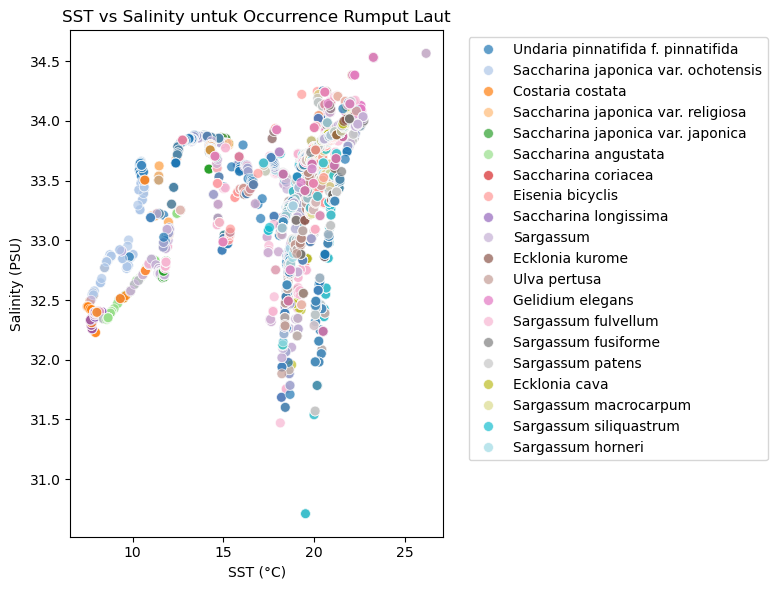

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="sst_mean", y="salinity_mean",
    hue="scientificName", palette="tab20", alpha=0.7, s=50
)
plt.title("SST vs Salinity untuk Occurrence Rumput Laut")
plt.xlabel("SST (°C)")
plt.ylabel("Salinity (PSU)")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.savefig("../figures/eda_sst_salinity_scatter.png", dpi=300)
plt.show()

### ✅ Summary Notebook 02

- Jumlah occurrence per spesies sudah terlihat, Sargassum, Undaria, dan Saccharina mendominasi.  
- Distribusi depth, SST, dan salinity sudah diperiksa.  
- Visualisasi spatial occurrence menunjukkan persebaran di perairan Jepang.  
- Scatter plot SST vs Salinity membantu melihat niche environmental tiap spesies.  
- Semua figure disimpan di folder `../figures/`.